In [2]:
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
data_train=pd.read_csv("C:\\Users\\ALN\\Desktop\\yapay zeka\\card_transdata.csv")

In [5]:
data_train.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [6]:
data_train.shape

(1000000, 8)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
data_train.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
data_train.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_train['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
X = data_train.drop('fraud', axis=1) 
y = data_train['fraud'] 

In [12]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [13]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [15]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
566853,36.217183,0.247838,0.181411,1.0,1.0,0.0,1.0
382311,20.673837,0.573091,0.663585,1.0,1.0,0.0,1.0
241519,4.785209,2.389048,3.537959,1.0,1.0,0.0,1.0
719220,5.911469,1.238674,0.283680,1.0,0.0,0.0,1.0
905718,31.651844,1.688151,0.174281,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
259178,0.539606,3.479517,0.129496,0.0,0.0,0.0,0.0
365838,113.803098,0.165044,1.523632,1.0,0.0,0.0,0.0
131932,20.473521,0.004376,0.915167,1.0,0.0,0.0,0.0
671155,9.958865,0.168019,1.174115,1.0,0.0,0.0,1.0


In [16]:
y_train

566853    0.0
382311    0.0
241519    0.0
719220    0.0
905718    0.0
         ... 
259178    0.0
365838    0.0
131932    0.0
671155    0.0
121958    0.0
Name: fraud, Length: 800000, dtype: float64

In [17]:
X_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
987231,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0
79954,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0
567130,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0
500891,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0
55399,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
90245,56.686649,0.820179,6.051695,1.0,0.0,1.0,1.0
639296,5.544863,0.072644,1.350344,1.0,0.0,0.0,1.0
311939,4.449740,2.045690,9.814511,1.0,1.0,0.0,1.0
324459,34.624330,0.580115,0.424248,1.0,0.0,0.0,0.0


In [18]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
90245     0.0
639296    0.0
311939    1.0
324459    0.0
390499    0.0
Name: fraud, Length: 200000, dtype: float64

In [19]:
# Özellik seçimi yapın (örnek olarak k=5)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [20]:
#Özelliklerin indeksleri
secilen_indeksler = selector.get_support(indices=True)

#Orijinal özellik isimleri
secilen_ozellik_isimleri = X.columns[secilen_indeksler]

print("Seçilen Önemli 5 Özellik:")
print(secilen_ozellik_isimleri)

Seçilen Önemli 5 Özellik:
Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'used_pin_number', 'online_order'],
      dtype='object')


In [21]:
# StandartScaler'ı oluşturun ve eğitim setini standardize edin
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_selected)
X_test_std = scaler.transform(X_test_selected)

In [22]:
X_train_std

array([[ 0.14717014, -0.1811908 , -0.58818513, -0.33459348,  0.73288438],
       [-0.09117429, -0.16885924, -0.41565266, -0.33459348,  0.73288438],
       [-0.33481332, -0.1000095 ,  0.61286024, -0.33459348,  0.73288438],
       ...,
       [-0.09424595, -0.19042138, -0.32563131, -0.33459348, -1.36447171],
       [-0.25547956, -0.18421704, -0.23297423, -0.33459348,  0.73288438],
       [-0.39739255, -0.0955002 , -0.16555184, -0.33459348, -1.36447171]])

In [23]:
X_test_std

array([[-0.3939373 , -0.14143297, -0.52388475, -0.33459348,  0.73288438],
       [-0.39881863, -0.18269005,  0.4629064 , -0.33459348,  0.73288438],
       [-0.3475276 , -0.17052356, -0.08776037, -0.33459348, -1.36447171],
       ...,
       [-0.33995746, -0.11302746,  2.85874632, -0.33459348,  0.73288438],
       [ 0.12274505, -0.16859295, -0.50129261, -0.33459348, -1.36447171],
       [-0.36770666, -0.17149981,  0.80380742,  2.98870138, -1.36447171]])

In [24]:
y_test

987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
90245     0.0
639296    0.0
311939    1.0
324459    0.0
390499    0.0
Name: fraud, Length: 200000, dtype: float64

# Training the model (Model Eğitimi)

# 1) Decision Tree(Karar Ağacı)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
depths_to_try = [3, 5, 7, 10, 15]

for depth in depths_to_try:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)  # 5 katlı çapraz doğrulama
    print(f"Ağaç Derinliği: {depth}, Ortalama Doğruluk: {scores.mean()}")
    


Ağaç Derinliği: 3, Ortalama Doğruluk: 0.97956875
Ağaç Derinliği: 5, Ortalama Doğruluk: 0.99874625
Ağaç Derinliği: 7, Ortalama Doğruluk: 0.9999812499999999
Ağaç Derinliği: 10, Ortalama Doğruluk: 0.99997875
Ağaç Derinliği: 15, Ortalama Doğruluk: 0.9999750000000001


In [45]:
dt=DecisionTreeClassifier(max_depth=3)

In [46]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [47]:
y_pred


array([0., 0., 0., ..., 1., 0., 0.])

In [48]:
y_test


987231    0.0
79954     0.0
567130    0.0
500891    0.0
55399     0.0
         ... 
90245     0.0
639296    0.0
311939    1.0
324459    0.0
390499    0.0
Name: fraud, Length: 200000, dtype: float64

In [49]:
from sklearn.metrics import accuracy_score
dt_ac=accuracy_score(y_test,y_pred)


In [51]:
dt_ac


0.979365

# 2) KNN

In [52]:
#KNN'nin avantajları şunlardır:

#Basit ve anlaşılır.
#Eğitim süreci yoktur; sadece veri noktalarının saklandığı bir yapıdır.
#Ancak, KNN'nin dezavantajları şunlar olabilir:

#Tahmin yapmak için tüm veri setine erişim gerektirir, bu nedenle büyük veri setlerinde maliyetli olabilir.
#Boyutluluk laneti (curse of dimensionality) ile başa çıkmak için özel önlemler alınmalıdır.
#Aşırı uyma (overfitting) eğilimlidir, bu nedenle uygun bir k değerinin seçilmesi önemlidir.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-En Yakın Komşular (KNN) sınıflandırıcıyı oluşturun
## knn_classifier = KNeighborsClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=5)



In [54]:
# Standartlaştırılmış eğitim verisini kullanarak modeli eğitin
knn_classifier.fit(X_train_std, y_train)

KNeighborsClassifier()

In [55]:
# Standartlaştırılmış test verisini kullanarak tahmin yapın
y_pred_knn = knn_classifier.predict(X_test_std)

# Modelin doğruluğunu değerlendirin
knn_ac = accuracy_score(y_test, y_pred_knn)


In [56]:
knn_ac

0.983245

# 3) Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [58]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [59]:
y_pred=lr.predict(X_test_std)

In [60]:
y_pred


array([0., 0., 0., ..., 1., 0., 0.])

In [61]:
lr_ac=accuracy_score(y_test,y_pred)

In [62]:
lr_ac

0.956385

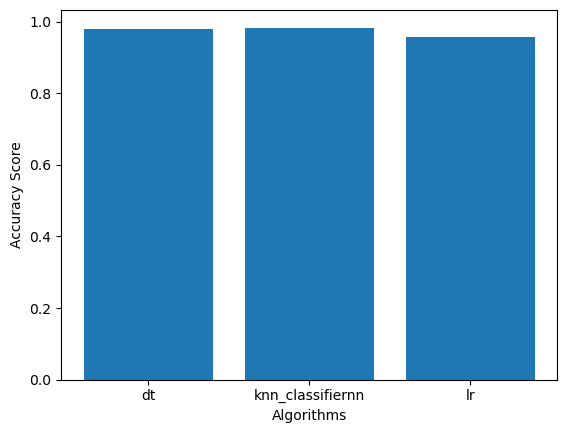

In [63]:
plt.bar(x=['dt','knn_classifiernn','lr'],height=[dt_ac,knn_ac ,lr_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()